In [3]:
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
df.shape

(150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
le = preprocessing.LabelEncoder()
df['species_code'] = le.fit_transform(df['species'])

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,149.0,5.843624,0.830851,4.3,5.1,5.8,6.4,7.9
sepal_width,149.0,3.059732,0.436342,2.0,2.8,3.0,3.3,4.4
petal_length,149.0,3.748993,1.767791,1.0,1.6,4.3,5.1,6.9
petal_width,149.0,1.194631,0.762622,0.1,0.3,1.3,1.8,2.5
species_code,149.0,0.993289,0.817847,0.0,0.0,1.0,2.0,2.0


In [14]:
num_col = df.select_dtypes(include=['float64','int64']).columns.to_list()
cat_col = df.select_dtypes(include='object').columns.to_list()

In [15]:
print(num_col)
print(cat_col)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_code']
['species']


sepal_length


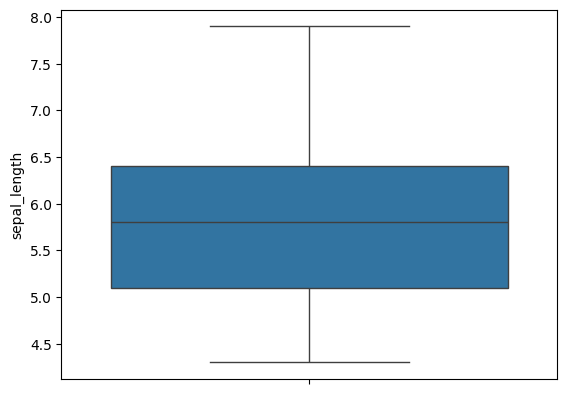

sepal_width


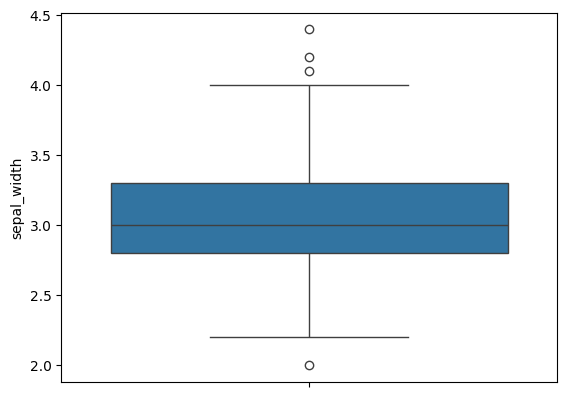

petal_length


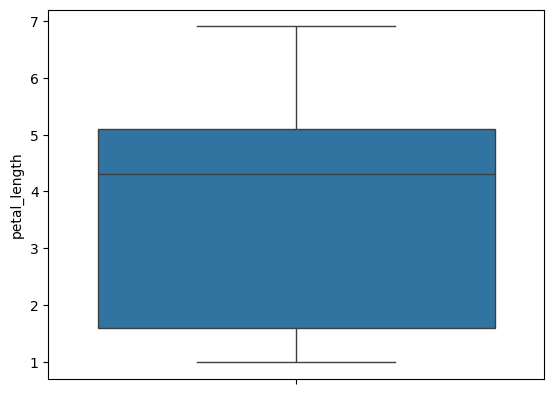

petal_width


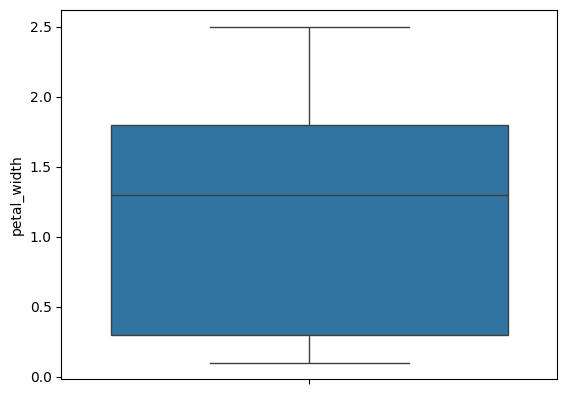

species_code


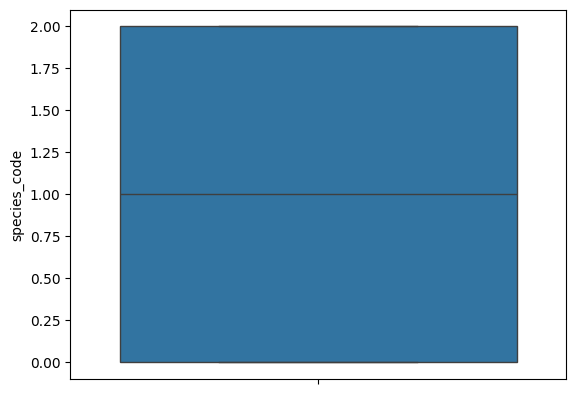

In [16]:
for i in num_col:
    print(i)

    sns.boxplot(df[i])
    plt.show()

<Axes: >

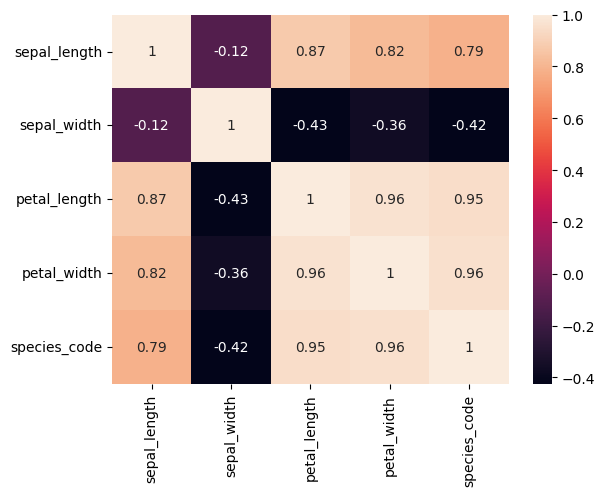

In [17]:
corr = df[num_col].corr()
sns.heatmap(corr,annot=True)

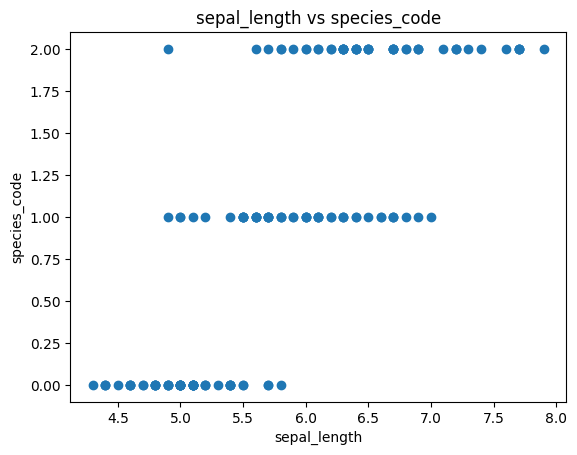

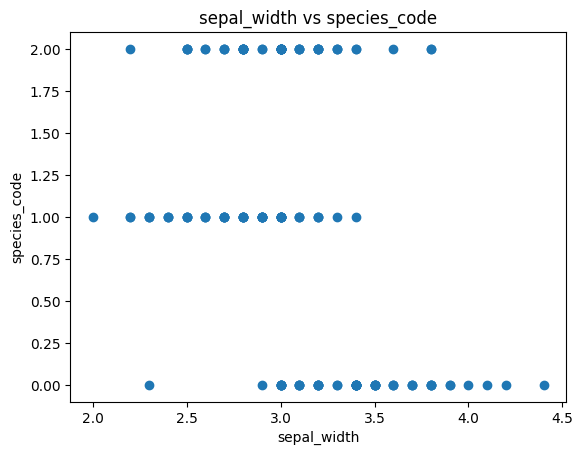

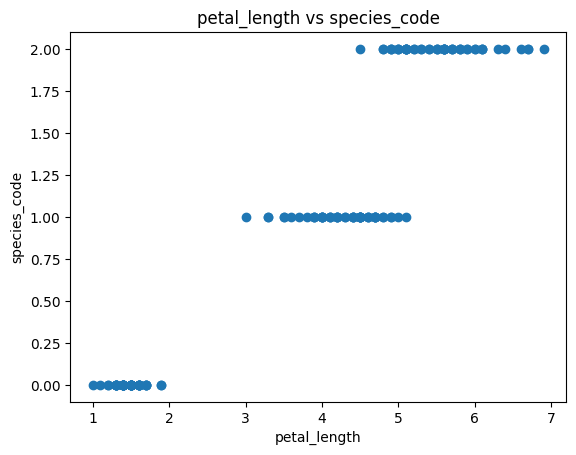

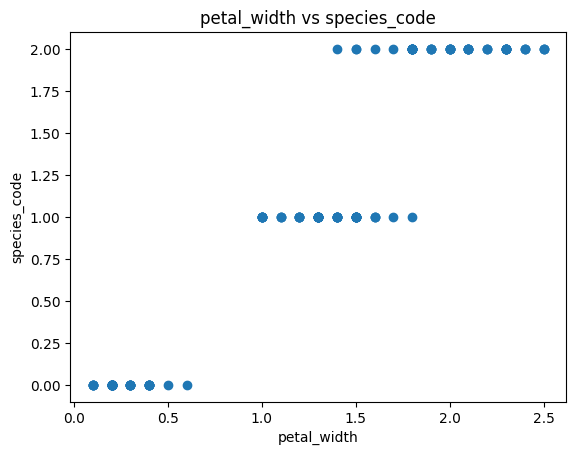

In [18]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in col:
    plt.scatter(df[i],df['species_code'])
    plt.xlabel(i)
    plt.ylabel('species_code')
    plt.title(f'{i} vs species_code')
    plt.show()

In [19]:
from sklearn.model_selection import train_test_split
import numpy as np

In [20]:
X = df[['petal_length','petal_width','sepal_length','sepal_width']]
Y = np.array(df['species_code']).reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [21]:
from sklearn.neighbors import KNeighborsClassifier # type: ignore
knn = KNeighborsClassifier(n_neighbors=10)

In [22]:
knn.fit(X_train,Y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [23]:
df[df['species_code'] == 0].size

300

In [24]:
df[df['species_code'] == 1].size

300

In [25]:
df[df['species_code'] == 2].size

294

In [26]:
knn.score(X_test,Y_test)

1.0

In [27]:
y_pred = knn.predict(X_test)

In [28]:
knn.predict([[6.0,3.0,5.5,2.2]])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [29]:
df[df['species_code'] == 2]


,sepal_length,sepal_width,petal_length,petal_width,species,species_code
100,6.3,3.3,6.0,2.5,virginica,2
101,5.8,2.7,5.1,1.9,virginica,2
102,7.1,3.0,5.9,2.1,virginica,2
103,6.3,2.9,5.6,1.8,virginica,2
104,6.5,3.0,5.8,2.2,virginica,2
105,7.6,3.0,6.6,2.1,virginica,2
106,4.9,2.5,4.5,1.7,virginica,2
107,7.3,2.9,6.3,1.8,virginica,2
108,6.7,2.5,5.8,1.8,virginica,2
109,7.2,3.6,6.1,2.5,virginica,2


In [30]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_code
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


In [31]:
accuracy = (10+10+9)/(10+10+9+1)
accuracy

0.9666666666666667

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  0,  4]])

Text(50.722222222222214, 0.5, 'Predicted')

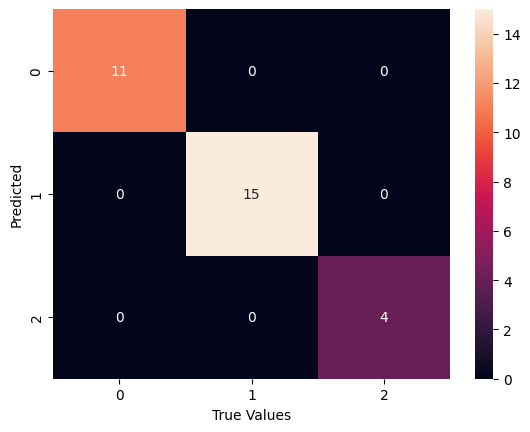

In [33]:
sns.heatmap(cm, annot=True)
plt.xlabel('True Values')
plt.ylabel('Predicted')

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import  export_graphviz
from IPython.display import Image
import pydotplus

In [40]:
df['sepal_length'] = pd.cut(df['sepal_length'], bins=[4,5,6,7,8], labels=[0,1,2,3])
df['petal_width'] = pd.cut(df['petal_width'], bins=[0,1,2,3], labels=[0,1,2])
df['petal_length'] = pd.cut(df['petal_length'], bins=[1,3,5,7], labels=[0,1,2], include_lowest=True)
df['sepal_width'] = pd.cut(df['sepal_width'], bins=[2,3,4,5], labels=[0,1,2], include_lowest=True)

In [41]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,Y_train)
model

DecisionTreeClassifier(criterion='entropy')

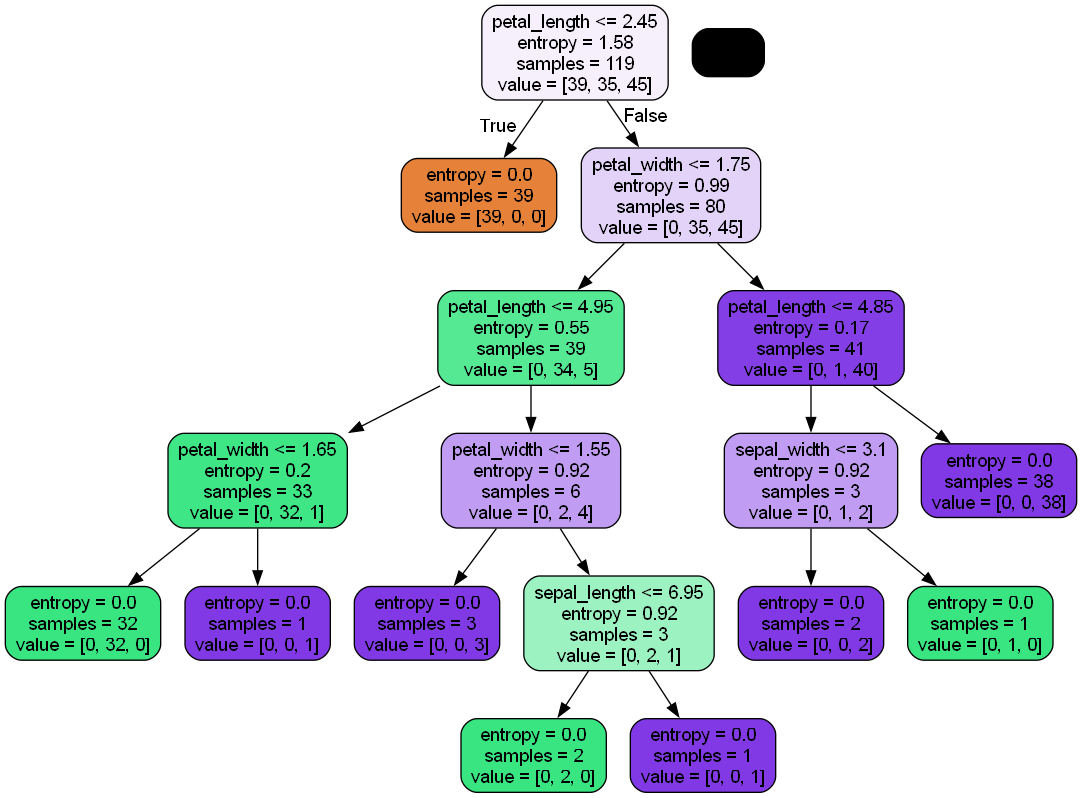

In [43]:
dot_data = export_graphviz(model, feature_names=X_train.columns, out_file=None, rounded=True, proportion=False, precision=2,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [44]:
accuracy_score(Y_test,model.predict(X_test))

1.0

In [45]:
cm = confusion_matrix(Y_test,model.predict(X_test))
cm

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  0,  4]])

<Axes: >

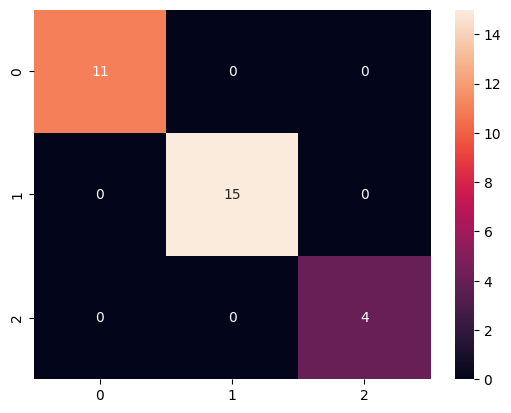

In [46]:
sns.heatmap(cm,annot=True)
plt.x

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100,max_samples=0.8) #100 trees and 80% of the dataset to create the samples
rf_classifier.fit(X_train,Y_train)
rf_classifier

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_samples=0.8)

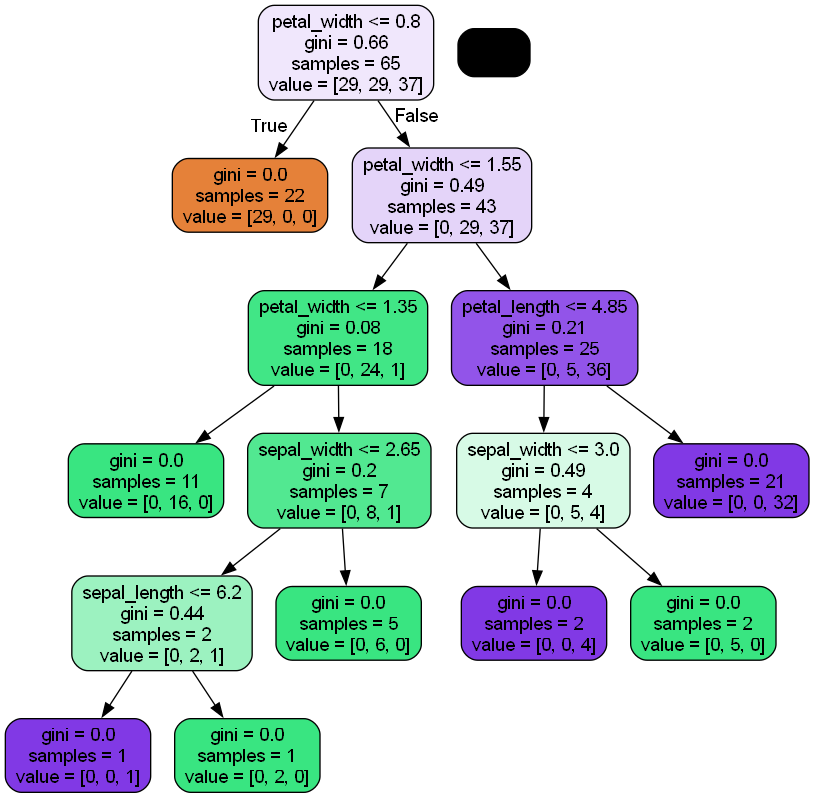

In [56]:
estimator = rf_classifier.estimators_[1] #chhosing a tree from the 100 trees in the rf
dot_data = export_graphviz(estimator, feature_names=X_train.columns, out_file=None, rounded=True, proportion=False, precision=2,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Implementing KNN

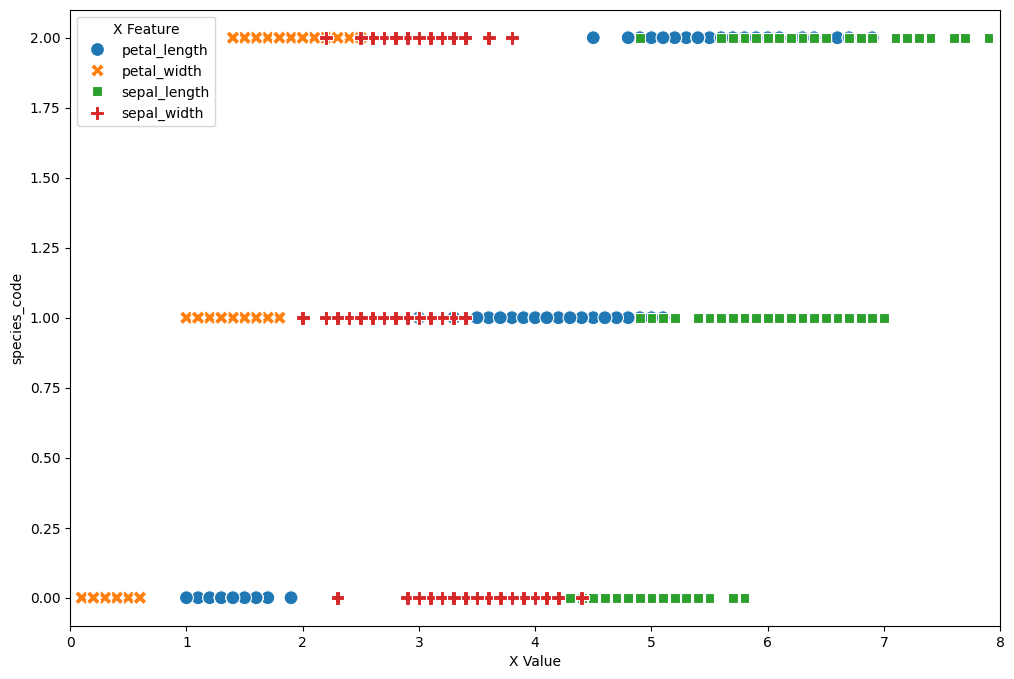

In [36]:
plt.figure(figsize=(12,8))
df_melted = df.melt(id_vars='species_code', value_vars=['petal_length','petal_width','sepal_length','sepal_width'],
                    var_name='X Feature', value_name='X Value')

# Create the scatter plot
sns.scatterplot(data=df_melted, x='X Value', y='species_code', hue='X Feature', style='X Feature', s=100)  # s is the size of the markers)
plt.xlim(0,8)
# Show the plot
plt.show()

In [37]:
# Implementing KNN

def knn(k, x2, y2):
    def euclidean_distance(x1, y1, x2, y2):
        dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        return dist
    # Calculate distances from the given point to all other points
    if k>0 and k< len(df_melted):
        df_melted['distance'] = df_melted.apply(lambda row: euclidean_distance(row['X Value'], row['species_code'], x2, y2), axis=1)

        # Handle the case where k might be larger than the number of points
        # k = min(k, len(df_sorted))
        # Sort by distance and select the top k nearest neighbors
        df_sorted = df_melted.sort_values(by='distance').head(k)

        # Perform majority voting to find the most frequent species_code
        #species_counts = df_sorted['species_code'].value_counts() #only for idmax()
        # # Get the species with the highest count (handle ties by choosing the first one)
        # predicted_species = species_counts.idxmax()
        # Perform majority voting to classify the point for classification tasks
        # predicted_species = df_sorted['species_code'].mode()[0]
        # Perform regression by averaging the y-values of the nearest neighbors
        predicted_species = df_sorted['species_code'].mean()  

        return predicted_species

print(knn(10,3.6,1.75))

2.0


In [38]:
def knn(k, x2, y2):
    def euclidean_distance(x1, y1, x2, y2):
        dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        return dist
    # Calculate distances from the given point to all other points
    df_melted['distance'] = df_melted.apply(lambda row: euclidean_distance(row['X Value'], row['species_code'], x2, y2), axis=1)
    k = min(len(df_melted),k)
    # Now, df_melted contains a new column 'distance' with the Euclidean distances
    df2 = df_melted[['X Value', 'species_code', 'distance']]
    dfs = df2.sort_values(by='distance',ascending=True).head(k)
    return dfs['species_code'].mode()[0]

print(knn(10,2.4,0.78))

1
